In [1]:
!pip install CFEDemands
!pip install ConsumerDemands
!pip install oauth2client
!pip install eep153_tools
!pip install dvc
!pip install gnupg

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
  Using cached dvc-2.10.1-py3-none-any.whl (400 kB)
Processing /home/jovyan/.cache/pip/wheels/4b/35/53/dfa4d3a4196794cb0a777a97c68dcf02b073d33de9c135d72a/configobj-5.0.6-py3-none-any.whl
  Using cached pathspec-0.9.0-py2.py3-none-any.whl (31 kB)
  Using cached diskcache-5.4.0-py3-none-any.whl (44 kB)
Processing /home/jovyan/.cache/pip/wheels/ee/1f/7c/610bdb7d5541b98d9743c5953e32681ef35dd54fadddd347e8/nanotime-0.5.2-py3-none-any.whl
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached dictdiffer-0.9.0-py2.py3-none-any.whl (16 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached grandalf-0.6-py3-none-any.whl (31 kB)
Processing /home/jovyan/.cache/pip/wheels/2e/5d/81/d6e52fec193180ffffef19b185ecf1d

In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 292 kB 4.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pint: filename=Pint-0.19.2-py3-none-any.whl size=231020 sha256=b1c912367567bef9950c142341080f762d15a2394ef34fde3813e5e0566a675b
  Stored in directory: /home/jovyan/.cache/pip/wheels/4e/e3/93/6f6e5d37c9887117c3aede19f309becb52e0b461eddbb00270
Successfully built pint
  Attempting uninstall: pint
    Found existing installation: Pint 0.17
    Uninstalling Pint-0.17:
      Successfully uninstalled Pint-0.17


In [3]:
InputFiles = {'Expenditures':('1-rP6IC2wm91nH94xApeLCXS7dslqlsTns9si57Hs1c0','Expenditures'),
              'malawi_consumption':('1c2rXKtnVawQ802xAh4qm5HDK9MiFTFlGZJjcgTooRVo','malawi_consumption'),
              'HH Characteristics':('1-rP6IC2wm91nH94xApeLCXS7dslqlsTns9si57Hs1c0','HH Characteristics'),
              'FCT':('1Uy4h4cB3_O6Ls3Pvk920ScTA1jaKdVb4TAkZ51n-8DA','05 NV_sum_57 (per 100g EP)')}

In [4]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    dfs = read_sheets(key)

    if sheet is not None:
        df = dfs[sheet]
    else:
        df = dfs.values()[0]
        
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

In [5]:
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

Key available for students@eep153.iam.gserviceaccount.com.


,,i,Apple,Avocado,Banana,"Bean, brown","Bean, white",Beef,Biscuits,Bottled water,Bottled/ canned beer,Bread,...,Tomato,Tomato sauce (bottle),Traditional beer (masase),Wheat flour,White sweet potato,"Wild fruit (masau, mlambe, etc.)",Wine or commercial liquor,"Yeast, baking powder, bicarbonate of soda",Yoghurt,nan
j,t,m,,,,,,,,,,,,,,,,,,,,,
10101002025,2004,1,NaN,10.0,NaN,NaN,NaN,160.0,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
10101002051,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10101002072,2004,1,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
10101002079,2004,1,NaN,16.0,60.0,NaN,NaN,60.0,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
10101002095,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,2010,1,NaN,NaN,NaN,160.0,NaN,NaN,NaN,NaN,NaN,260.0,...,150.0,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
315556140365,2010,1,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
315556140388,2010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN


In [57]:
# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

Key available for students@eep153.iam.gserviceaccount.com.


,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
j,t,m,,,,,,,,,,,,,,
10101002025,2004,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0
10101002051,2004,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
10101002072,2004,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0
10101002079,2004,1,0,1,0,0,0,1,0,2,1,0,0,0,1,0
10101002095,2004,1,0,0,2,0,1,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,2010,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
315556140365,2010,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
315556140388,2010,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [64]:
#def return_household(row):
#    household = np.array([])
#    for j in range(len(row)):
#        if row[1] == 1:
#                household = np.append(household,row.index[j])
#    return household

In [65]:
#arr = np.array([])
#for i in range(len(z)):
#    arr = np.append(arr,return_household(z.iloc[i]))
#arr

array(['M 0-3', 'M 4-8', 'M 9-13', ..., 'F 19-30', 'F 31-50', 'F 51+'],
      dtype='<U32')

In [88]:
z_adj = (z[(z['M 0-3']!= 0) | (z['F 0-3'] != 0) | (z['M 4-8'] != 0) | (z['F 4-8'] != 0)])
z_adj

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
j,t,m,,,,,,,,,,,,,,
10101002025,2004,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0
10101002051,2004,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
10101002072,2004,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0
10101002079,2004,1,0,1,0,0,0,1,0,2,1,0,0,0,1,0
10101002095,2004,1,0,0,2,0,1,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140159,2010,1,0,0,0,0,0,1,0,0,1,2,0,1,0,0
315556140205,2010,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
315556140297,2010,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0


In [7]:
q = get_clean_sheet(InputFiles['malawi_consumption'][0],
                    sheet=InputFiles['malawi_consumption'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

q

Key available for students@eep153.iam.gserviceaccount.com.


i                              Apple  Avocado  Banana  Bean, brown  \
j           t    m u                                                 
10101002025 2004 1 Gram          NaN      NaN     NaN          NaN   
                   Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      2.0     NaN          NaN   
10101002051 2004 1 Gram          NaN      NaN     NaN          NaN   
...                              ...      ...     ...          ...   
31202086364 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   
31202086374 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   

i                              Bean, white  Beef  Biscuits  Bottled water  \
j           t    m u                                                        
10101002025 2004 1 Gram                NaN   NaN       NaN            NaN   
                   Kg                  NaN   2.0       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
10101002051 2004 1 Gram                NaN   NaN       NaN            NaN   
...                                    ...   ...       ...            ...   
31202086364 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
31202086374 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   

i                              Bottled/ canned beer  Bread  ...  Tomato  \
j           t    m u                                        ...           
10101002025 2004 1 Gram                         NaN    NaN  ...     NaN   
                   Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     5.0   
10101002051 2004 1 Gram                         NaN    NaN  ...     NaN   
...                                             ...    ...  ...     ...   
31202086364 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...    15.0   
31202086374 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     7.0   

i                              Tomato sauce (bottle)  \
j           t    m u                                   
10101002025 2004 1 Gram                          NaN   
                   Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
10101002051 2004 1 Gram                          NaN   
...                                              ...   
31202086364 2004 1 Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
31202086374 2004 1 Kg                            NaN   
                   Piece                         NaN   

i                              Traditional beer (masase)  Wheat flour  \
j           t    m u                                                    
10101002025 2004 1 Gram                              NaN          NaN   
                   Kg                                NaN          NaN   
                   Millilitre                        NaN          NaN   
                 

In [8]:
def return_household(row):
    household = np.array([])
    for j in range(len(row)):
        if row[j]==1:
            if (row.index[j] !='M 0-3') & (row.index[j] !='F 0-3'):
                household = np.append(household,row.index[j])
    return household

In [9]:
z.apply

<bound method DataFrame.apply of k                    M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  \
j            t    m                                                           
10101002025  2004 1      1      0       1        1        0        1      0   
10101002051  2004 1      0      0       0        0        1        0      0   
10101002072  2004 1      1      1       0        1        0        1      0   
10101002079  2004 1      0      1       0        0        0        1      0   
10101002095  2004 1      0      0       2        0        1        0      0   
...                    ...    ...     ...      ...      ...      ...    ...   
315556140342 2010 1      1      0       0        0        1        0      0   
315556140365 2010 1      0      0       0        0        0        1      0   
315556140388 2010 1      0      0       0        0        1        0      0   
315556140411 2010 1      1      0       0        0        2        0      0   
315556140434 2010 1

In [10]:
import sys
import cfe

y = np.log(x)
y
result = cfe.Result(y=y,z=z)

Missing dependencies for OracleDemands.


In [11]:
result.get_reduced_form()

In [12]:
result.delta.to_dataframe().unstack('k')

delta                      \
k                                             M 0-3     M 4-8    M 9-13   
i                                                                         
Avocado                                   -0.027469  0.036233 -0.003036   
Banana                                    -0.094776 -0.079738  0.054585   
Bean, brown                                0.033756  0.058986  0.062206   
Bean, white                                0.088998  0.050373  0.097664   
Beef                                      -0.098905  0.033595  0.060964   
Biscuits                                  -0.224607 -0.173919  0.092814   
Bread                                     -0.065294 -0.004541  0.059943   
Buns, scones                               0.045246  0.120182  0.113218   
Cabbage                                    0.014356  0.015227  0.079775   
Cassava tubers                             0.027358  0.048204  0.101075   
Chicken                                   -0.109181  0.007102  0.016048   
Chinese cabbage                            0.103933 -0.009215  0.075137   
Chips (vendor)                            -0.054027 -0.069796  0.035470   
Citrus, naartje, orange, etc.              0.005910 -0.110700  0.039455   
Cooking oil                               -0.099341 -0.079330  0.009946   
Dried fish                                -0.008991  0.006457  0.023662   
Eggs                                      -0.056172 -0.002189  0.055644   
Freezes (flavoured ice)                    0.126634  0.058527 -0.054907   
Fresh fish                                -0.121088 -0.049693 -0.031192   
Fresh milk                                -0.073576 -0.040439  0.057022   
Goat                                      -0.007920 -0.012172  0.109584   
Green maize                               -0.058496  0.010045  0.122148   
Groundnut                                 -0.028979 -0.001292  0.052138   
Groundnut flour                           -0.048324 -0.047073 -0.018861   
Irish potato                              -0.091835 -0.061779  0.038687   
Maize - boiled or roasted                 -0.041780  0.024351  0.097697   
Maize ufa mgaiwa (normal flour)            0.064310  0.112515  0.041167   
Maize ufa refined (fine flour)             0.018110  0.063524  0.142145   
Mandazi, doughnut (vendor)                 0.046214  0.009386  0.062543   
Meat (vendor)                             -0.004185  0.053168 -0.023871   
Meat eaten at restaurant                  -0.280654 -0.132582  0.000111   
Nkwani                                     0.031160  0.033066  0.047762   
Okra / Therere                             0.014872 -0.055624  0.051188   
Onion                                     -0.091255 -0.071492  0.024967   
Orange sweet potato                        0.161137  0.019499  0.062452   
Pork                                      -0.011009 -0.006449  0.131056   
Powdered milk                             -0.256034 -0.050838 -0.001133   
Rice                                      -0.039716 -0.001724  0.017940   
Salt                                       0.003369  0.010418  0.082138   
Samosa (vendor)                           -0.247947  0.056758 -0.128120   
Soft drinks (coca cola, fanta)            -0.100256 -0.027790 -0.008544   
Sugar                                      0.064521  0.044586  0.073426   
Sugar cane                                 0.081139  0.010243  0.090556   
Sweets, candy, chocolates                 -0.290199 -0.086628 -0.118559   
Tanaposi rape                              0.042259  0.039258  0.050717   
Tea                                       -0.084797 -0.006682  0.072521   
Tomato                                    -0.100691 -0.075390  0.004835   
White sweet potato                         0.046810  0.057825  0.181314   
Yeast, baking powder, bicarbonate of soda -0.110725 -0.072785  0.022043   

                                                                         \
k                                           M 14-18   M 19-30   M 31-5

In [13]:
result.a.to_dataframe().unstack('i')

a                                                        \
i        Avocado    Banana Bean, brown Bean, white      Beef  Biscuits   
t    m                                                                   
2004 1  2.732589  2.553386    3.563498    3.480738  4.906085  2.736930   
2010 1  3.709544  3.873656    4.573519    4.511708  5.846323  3.824394   

                                                        ...                  \
i          Bread Buns, scones   Cabbage Cassava tubers  ... Samosa (vendor)   
t    m                                                  ...                   
2004 1  4.330692     3.272087  2.821576       2.735024  ...        2.692764   
2010 1  5.089198     4.234627  3.772250       3.782887  ...        3.680945   

                                                            \
i      Soft drinks (coca cola, fanta)     Sugar Sugar cane   
t    m                                                       
2004 1                       4.026075  3.647259   2.475238   
2010 1                       4.758748  4.549718   3.376966   

                                                                    \
i      Sweets, candy, chocolates Tanaposi rape       Tea    Tomato   
t    m                                                               
2004 1                  1.879936      2.486638  2.237929  3.439653   
2010 1                  3.224241      3.538246  2.994732  4.361938   

                                                                     
i      White sweet potato Yeast, baking powder, bicarbonate of soda  
t    m                                                               
2004 1           2.985221                                  1.016818  
2010 1           4.048783                                  2.198148  

[2 rows x 49 columns]

In [14]:
result.get_beta(as_df=True)

i
Avocado                                      0.383249
Banana                                       0.598940
Bean, brown                                  0.192255
Bean, white                                  0.232248
Beef                                         0.365007
Biscuits                                     0.816535
Bread                                        0.360046
Buns, scones                                 0.303703
Cabbage                                      0.259849
Cassava tubers                               0.286150
Chicken                                      0.276638
Chinese cabbage                              0.313419
Chips (vendor)                               0.352606
Citrus, naartje, orange, etc.                0.648388
Cooking oil                                  0.591433
Dried fish                                   0.369809
Eggs                                         0.357952
Freezes (flavoured ice)                      0.561462
Fresh fish                

In [15]:
result.get_alpha(as_df = True)

i
Avocado                                      2.732589
Banana                                       2.553386
Bean, brown                                  3.563498
Bean, white                                  3.480738
Beef                                         4.906085
Biscuits                                     2.736930
Bread                                        4.330692
Buns, scones                                 3.272087
Cabbage                                      2.821576
Cassava tubers                               2.735024
Chicken                                      5.382624
Chinese cabbage                              2.325482
Chips (vendor)                               3.575587
Citrus, naartje, orange, etc.                2.329459
Cooking oil                                  3.783886
Dried fish                                   3.677535
Eggs                                         3.874567
Freezes (flavoured ice)                      1.836321
Fresh fish                

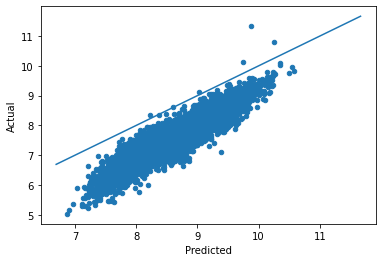

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [17]:
result.to_dataset('malawi.ds')

<xarray.Dataset>
Dimensions:           (j: 23551, i: 49, k: 14, t: 2, m: 1, kp: 14)
Coordinates:
  * j                 (j) int64 10101002025 10101002051 ... 315556140434
  * t                 (t) int64 2004 2010
  * m                 (m) int64 1
  * i                 (i) object 'Avocado' ... 'Yeast, baking powder, bicarbo...
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * kp                (kp) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables: (12/20)
    alpha             (i) float64 2.733 2.553 3.563 3.481 ... 3.44 2.985 1.017
    beta              (i) float64 0.3832 0.5989 0.1923 ... 0.5876 0.215 0.4303
    delta             (k, i) float64 -0.02747 -0.09478 0.03376 ... 0.1424 0.2584
    prices            object None
    characteristics   (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0
    loglambdas        (j, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    ...                ...
    se_beta           object None
    se_alpha          (i) float64 0.04403 0.02459 0.01747 ... 0.02794 0.04379
    se_a              (i, t, m) float64 0.04403 0.04426 0.02459 ... 0.04379 0.03
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0

4. Infer Prices

In [18]:
# Estimates most things (not counting std errors for betas).
xhat = result.get_predicted_expenditures(as_df = True) 
result.get_beta(as_df=True).sort_values(ascending=False).tail(30)

i
Rice                               0.385456
Avocado                            0.383249
Groundnut flour                    0.374055
Dried fish                         0.369809
Beef                               0.365007
Bread                              0.360046
Eggs                               0.357952
Tea                                0.354066
Chips (vendor)                     0.352606
Okra / Therere                     0.349072
Tanaposi rape                      0.322396
Mandazi, doughnut (vendor)         0.320827
Sugar cane                         0.320151
Goat                               0.318212
Maize - boiled or roasted          0.314049
Chinese cabbage                    0.313419
Buns, scones                       0.303703
Cassava tubers                     0.286150
Chicken                            0.276638
Green maize                        0.273208
Salt                               0.267673
Orange sweet potato                0.262067
Cabbage                       

In [19]:
phat = xhat/q
# Keep kgs; g
phat = phat.groupby(['t','m']).median().T.dropna(how='all')
result['prices'] = phat.stack().to_xarray().to_array()
# Make this persistent...
result.to_dataset('./foo.ds')

<xarray.Dataset>
Dimensions:           (j: 23551, i: 49, k: 14, variable: 2, m: 1, t: 2, kp: 14)
Coordinates:
  * j                 (j) int64 10101002025 10101002051 ... 315556140434
  * t                 (t) int64 2004 2010
  * m                 (m) int64 1
  * i                 (i) object 'Avocado' ... 'Yeast, baking powder, bicarbo...
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * kp                (kp) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * variable          (variable) int64 2004 2010
Data variables: (12/20)
    alpha             (i) float64 2.733 2.553 3.563 3.481 ... 3.44 2.985 1.017
    beta              (i) float64 0.3832 0.5989 0.1923 ... 0.5876 0.215 0.4303
    delta             (k, i) float64 -0.02747 -0.09478 0.03376 ... 0.1424 0.2584
    prices            (variable, i, m) float64 9.351 2.308 49.78 ... nan nan nan
    characteristics   (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0
    loglambdas        (j, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    ...                ...
    se_beta           object None
    se_alpha          (i) float64 0.04403 0.02459 0.01747 ... 0.02794 0.04379
    se_a              (i, t, m) float64 0.04403 0.04426 0.02459 ... 0.04379 0.03
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0

5. Predicting Positive Consumption

In [20]:
zeros_r = cfe.Result(y=(0.+(np.exp(result.y)>0)),z=result.z)
weights = zeros_r.get_predicted_log_expenditures()

# Truncate to make weights live in [0,1]
weights = weights.where((weights<1) + np.isnan(weights),1).where((weights>0) + np.isnan(weights),0)

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

# Calculate *expected* predicted expenditures, to make unconditional on being positive
xhat = (weights*result.get_predicted_expenditures())
xsum = xhat.sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

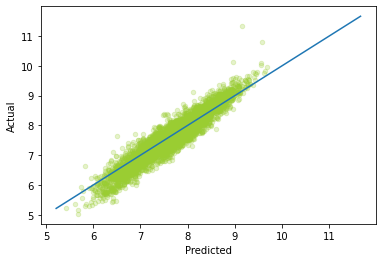

In [21]:
# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xsum)})

df.plot.scatter(x='Predicted',y='Actual', c = "yellowgreen", alpha = 0.25)

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

6. Predicting Quantities

In [22]:
xx = result.get_predicted_expenditures() 
xhatdf = xx.to_dataset('i').to_dataframe()
xhatdf.columns.name ='i'

qhat = xhatdf.div(phat.T,axis=1)

qhat

i                    Avocado  Banana  Bean, brown  Bean, white  Beef  \
t    m j                                                               
2004 1 10101002025       NaN     NaN          NaN          NaN   NaN   
       10101002051       NaN     NaN          NaN          NaN   NaN   
       10101002072       NaN     NaN          NaN          NaN   NaN   
       10101002079       NaN     NaN          NaN          NaN   NaN   
       10101002095       NaN     NaN          NaN          NaN   NaN   
...                      ...     ...          ...          ...   ...   
2010 1 315556140342      NaN     NaN          NaN          NaN   NaN   
       315556140365      NaN     NaN          NaN          NaN   NaN   
       315556140388      NaN     NaN          NaN          NaN   NaN   
       315556140411      NaN     NaN          NaN          NaN   NaN   
       315556140434      NaN     NaN          NaN          NaN   NaN   

i                    Biscuits  Bread  Buns, scones  Cabbage  Cassava tubers  \
t    m j                                                                      
2004 1 10101002025        NaN    NaN           NaN      NaN             NaN   
       10101002051        NaN    NaN           NaN      NaN             NaN   
       10101002072        NaN    NaN           NaN      NaN             NaN   
       10101002079        NaN    NaN           NaN      NaN             NaN   
       10101002095        NaN    NaN           NaN      NaN             NaN   
...                       ...    ...           ...      ...             ...   
2010 1 315556140342       NaN    NaN           NaN      NaN             NaN   
       315556140365       NaN    NaN           NaN      NaN             NaN   
       315556140388       NaN    NaN           NaN      NaN             NaN   
       315556140411       NaN    NaN           NaN      NaN             NaN   
       315556140434       NaN    NaN           NaN      NaN             NaN   

i                    ...  Samosa (vendor)  Soft drinks (coca cola, fanta)  \
t    m j             ...                                                    
2004 1 10101002025   ...              NaN                             NaN   
       10101002051   ...              NaN                             NaN   
       10101002072   ...              NaN                             NaN   
       10101002079   ...              NaN                             NaN   
       10101002095   ...              NaN                             NaN   
...                  ...              ...                             ...   
2010 1 315556140342  ...              NaN                             NaN   
       315556140365  ...              NaN                             NaN   
       315556140388  ...              NaN                             NaN   
       315556140411  ...              NaN                             NaN   
       315556140434  ...              NaN                             NaN   

i                    Sugar  Sugar cane  Sweets, candy, chocolates  \
t    m j                                                            
2004 1 10101002025     NaN         NaN                        NaN   
       10101002051     NaN         NaN                        NaN   
       10101002072     NaN         NaN                        NaN   
       10101002079     NaN         NaN                        NaN   
       10101002095     NaN         NaN                        NaN   
...                    ...         ...                        ...   
2010 1 315556140342    NaN         NaN                        NaN   
       315556140365    NaN         NaN                        NaN   
       315556140388    NaN         NaN                        NaN   
       315556140411    NaN         NaN                        NaN   
       315556140434    NaN         NaN                        NaN   

i                    Tanaposi rape  Tea  Tomato  White sweet potato  \
t    m j                                                        

In [23]:
qhat.to_csv('qhat.csv')